# Linear Regression Exercises

In [97]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

---
## E0.0 A) Simulate Phone Dataset

**Dataset variables:**  
X: Time Spent on Phone  
y: Cost  

In [98]:
# random seed for reproducability
np.random.seed(42)

# 400 random normally distributed points with mu = 100, sigma = 100
X = abs(np.random.normal(100, 100, 400))
print(f"X:\n{X[:4]}\n{max(X) = }\n{min(X) = }\n")

# 400 random normally distributed noise points with mu = 0, sigma = 50
epsilon = np.random.normal(0, 50, 400)
print(f"epsilon:\n{epsilon[:4]}\n{max(epsilon) = }\n{min(epsilon) = }\n")


beta_0 = 25 # intercept
beta_1 = 2  # slope

# y as a function of X with random noise added
y = beta_0 + beta_1 * X + epsilon

print(f"y:\n{y[:4]}\n{max(y) = }\n{min(y) = }\n")

X:
[149.6714153   86.17356988 164.76885381 252.30298564]
max(X) = 485.2731490654721
min(X) = 0.25293646378088397

epsilon:
[-79.72138294 -29.96875115   0.26218499   2.34902969]
max(epsilon) = 153.94404042276187
min(epsilon) = -134.84433214707857

y:
[244.62144766 167.37838862 354.79989261 531.95500097]
max(y) = 1070.3485137054033
min(y) = -54.484386920295805



### Plotting Dataset

Including cutoff lines for outliers

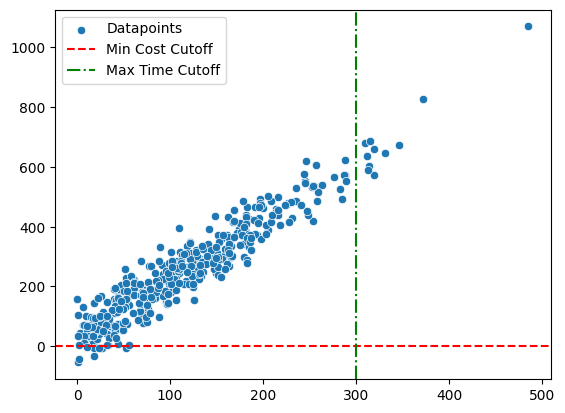

In [99]:
sns.scatterplot(x = X, y = y, label = "Datapoints")
plt.axhline(y = 0, color = "r", linestyle = "--", label = "Min Cost Cutoff")
plt.axvline(x = 300, color = "g", linestyle = "-.", label = "Max Time Cutoff")

plt.legend();

---
## E0.0 B) Remove Outliers

In [100]:
# getting indices where time is above 300
itemindex = np.where(X > 300)

# times above 300
X[itemindex]

array([346.32421125, 319.04556258, 372.01691666, 485.27314907,
       331.46585667, 314.39440893, 312.2156197 , 313.30333747,
       309.23872757, 315.31824575, 318.98029332])

In [101]:
# deleting indices of X outliers from both X and y
X = np.delete(X, itemindex)
y = np.delete(y, itemindex)

In [102]:
# getting indices where cost is below 0
itemindex = np.where(y < 0)

# costs below 0
y[itemindex]

array([-54.48438692,  -5.69655783,  -4.83339438, -41.67731495,
        -6.05340775,  -3.36951318, -31.48779068,  -6.98074857])

In [103]:
# deleting indices of y outliers from both X and y
X = np.delete(X, itemindex)
y = np.delete(y, itemindex)

In [104]:
# no more values below 0 cost or above 300 time
np.where(X > 300), np.where(y < 0)

((array([], dtype=int64),), (array([], dtype=int64),))

### Plotting Data After Removing Outliers

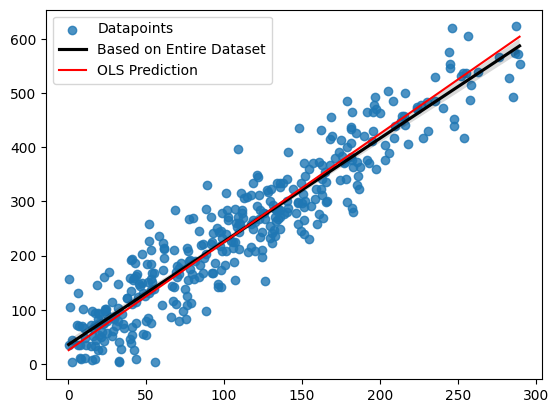

In [105]:
sns.regplot(x = X, y = y, label = "Datapoints", line_kws={"color": "black", "label": "Based on Entire Dataset"})
sns.lineplot(x = X, y = 2 * X + 25, color = "red", label = "OLS Prediction")

plt.legend();

---
## E0.0 C) Insert Values in DataFrame

Note that the dataframe is not used moving forwards as I intend to use numpy as much as possible for these exercises

In [106]:
df = pd.DataFrame()

df["X"] = X
df["y"] = y

df.head()

,X,y
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


---
## E0.1 A) Create Train | Test Split Function

In [107]:
def test_test_test(X, y, train_fraction = 0.7, random_state = 42, replace = False) -> tuple:
    
    # seed for reproducability
    np.random.seed(random_state)

    # amount of indices for training data
    n = int(len(X) * train_fraction)

    # generating array of random indices
    indices = np.random.choice(len(X), size = n, replace = replace)

    # split X and y into train and test data based on indices array
    X_train = X[indices]
    X_test = X[np.in1d(np.arange(len(X)), indices, invert=True)]

    y_train = y[indices]
    y_test = y[np.in1d(np.arange(len(y)), indices, invert=True)]

    return (X_train, X_test, y_train, y_test)

---
## E0.1 B) Split Dataset

In [109]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = test_test_test(X, y)

# checking dimensions to make sure everything looks right
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((266,), (266,), (115,), (115,))

---
## 0.2) Simple Linear Regression with Normal Equation

### Adding column of ones to X for use in normal equation

In [111]:
# adding a column of ones for coming calculation
ones = np.ones((len(X_train),))
X_train_matrix = np.stack((ones, X_train), axis= -1)

X_train_matrix[:3], X_train_matrix.shape

(array([[ 1.        , 39.97831228],
        [ 1.        , 11.61425638],
        [ 1.        , 53.9361229 ]]),
 (266, 2))

In [117]:
# adding a column of ones for coming calculation
ones = np.ones((len(X_test),))
X_test_matrix = np.stack((ones, X_test), axis= -1)

X_test_matrix[:3], X_test_matrix.shape

(array([[ 1.        , 86.17356988],
        [ 1.        , 76.58466253],
        [ 1.        , 53.05256141]]),
 (115, 2))

### Defining and using normal equation function to estimate beta

In [113]:
# defining function for estimating unknown parameters (beta vector)
OLS = lambda X, y: np.linalg.inv(X.T @ X) @ X.T @ y

# using function to estimate beta_hat based on training data
beta_hat = OLS(X_train_matrix, y_train)

beta_hat

array([32.22147722,  1.91050591])

In [122]:
# looking at dimensions to make sure everything is ready to move on
beta_hat.shape, X_test.shape, y_test.shape

((2,), (115,), (115,))

---
## E0.3 A) Prediction

### Defining and using prediction

In [119]:
# prediction function
predict = lambda x, beta: np.dot(x, beta)

# storing predictions to y_pred, reshaping from (115,1) to (115,)
y_pred = predict(X_test_matrix, beta_hat)

y_pred[:3], y_pred.shape

(array([196.85659218, 178.53692796, 133.57870958]), (115,))

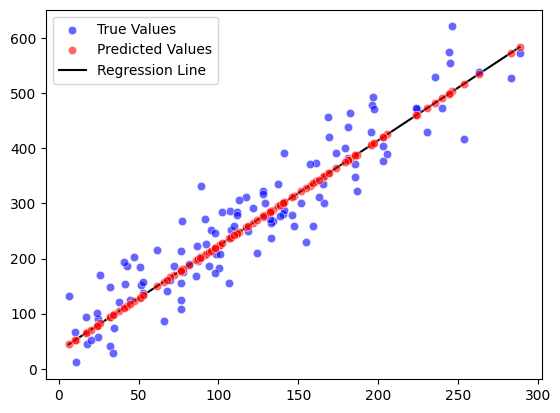

In [121]:
sns.scatterplot(x = X_test, y = y_test, color = "blue", alpha = 0.6, label = "True Values")
sns.scatterplot(x = X_test, y = y_pred, color = "red", alpha = 0.6, label = "Predicted Values")
sns.lineplot(x = X_test, y = y_pred, color = "black", zorder = 0, label = "Regression Line");

---
## E0.3 B) Evaluation

### Calculating MAE, MSE, RMSE

In [128]:
m = len(y_test)

mean_absolute_error = np.sum(np.abs(y_test - y_pred)) / m

mean_squared_error = np.sum((y_test - y_pred) ** 2) / m

root_mean_squared_error = np.sqrt(mean_squared_error)


print(f"MAE: {mean_absolute_error}")
print(f"MSE: {mean_squared_error}")
print(f"RMSE: {root_mean_squared_error}")

MAE: 40.12002651149212
MSE: 2401.5771288677274
RMSE: 49.00588871623213


---
## E0.4) Simulate More Explanatory Variables